In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  #standartlaştırma için eklendi
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Onur\Desktop\Turkcell_Machinelearning\Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])

y=df["Salary"]
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')

x=pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25,random_state=42)

MODEL & TAHMİN

In [3]:
gbm_model=GradientBoostingRegressor().fit(x_train,y_train)

In [4]:
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
y_pred=gbm_model.predict(x_test)

In [6]:
np.sqrt(mean_squared_error(y_test,y_pred))

350.7037052168899

TUNİNG

In [7]:
gbm_model=GradientBoostingRegressor().fit(x_train,y_train)
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
"""
criterion=BÖLÜNMELERLE İLGİLİ SAFLIK DERECESİNİ İFADE EDİYOR
learning_rate=AĞAÇLARIN KATSAYISI
loss=ls en küçük kareleri ifade etmektedir.    ld mutlak hata demek
max_depth= ağacın derinliği diğer algoritmalara göre burda biraz daha göz ardı edebiliriz
max_features= göz önünde bulundurulacak değişken sayısı
n_estimators=kullanılacak ağaç sayısı
subsample=oluşturulacak olan apğaçları oluştururken göz önğnde bulundurulacak oran 1 olursa hepsi
"""

'\ncriterion=BÖLÜNMELERLE İLGİLİ SAFLIK DERECESİNİ İFADE EDİYOR\nlearning_rate=AĞAÇLARIN KATSAYISI\nloss=ls en küçük kareleri ifade etmektedir. \nmax_depth= ağacın derinliği diğer algoritmalara göre burda biraz daha göz ardı edebiliriz\nmax_features= göz önünde bulundurulacak değişken sayısı\nn_estimators=kullanılacak ağaç sayısı\nsubsample=oluşturulacak olan apğaçları oluştururken göz önğnde bulundurulacak oran 1 olursa hepsi\n'

In [12]:
#lost fonksiyonu ile ilgili ayarlama yapmak istediğimizi düşünürsek

In [14]:
?gbm_model

Type:        GradientBoostingRegressor
String form:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
           <...> =1.0, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)
Length:      100
File:        c:\users\onur\anaconda3\envs\test_conda_env\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
    loss function to be optimized. 'ls' refers to least squares
    regression. 'lad' (least absolute deviation) is a highly robust
    loss function solely based on order information of the input
    variables. 'huber' is a combin

In [8]:
gbm_params={"learning_rate" : [0.001,0.1,0.01],  #daha hızlı bitmesi için 0,5 i çıkardık
           "max_depth":[3,5,8],      #10 u çıkardık
           "n_estimators" : [100,200,500],  #1000 i çıkardık
           "subsample": [1,0.5,0.8],
           "loss" : ['ls', 'lad','quantile']}

In [9]:
gbm_model=GradientBoostingRegressor().fit(x_train,y_train)

In [10]:
gbm_cv_model=GridSearchCV(gbm_model,gbm_params,cv=10 , n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 11.8min finished


In [11]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [19]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.1,
                                   loss='ls',
                                   max_depth=3,
                                   n_estimators=100,
                                   subsample=0.5).fit(x_train,y_train)

In [22]:
y_pred=gbm_tuned.predict(x_test)

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred))

339.9226546876395

In [24]:
#Değişkenlerin önem düzeyleri

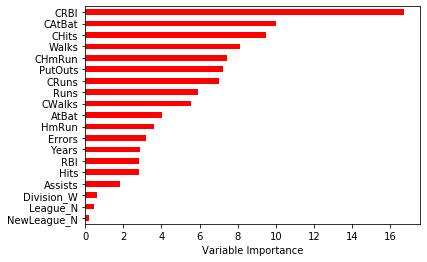

In [25]:
Importance=pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100},
                       index=x_train.columns)
Importance.sort_values(by='Importance',
                      axis=0,
                      ascending=True).plot(kind='barh',color='r',)

plt.xlabel('Variable Importance')
plt.gca().legend_=None